# Automated Attendance Monitoring & Email Generation Using Gemini API

This notebook demonstrates an end-to-end workflow for automating attendance monitoring and generating personalized email alerts for students falling below a required attendance threshold. The workflow:

    - Accepts CSV content pasted directly in the script or input
    - Accepts a natural-language instruction
    - Uses OpenAI API to extract:
        * Required action
        * Attendance condition
        * Email body
    - Filters students based on attendance threshold
    - Sends emails to parents

In [ ]:
!pip install google-genai # This installs the Google Generative AI client library.
# After installation, you'll typically use genai.configure(api_key=YOUR_API_KEY) to authenticate your access to the Gemini API.

In [ ]:
import google.generativeai as genai
import json

In [ ]:
""" An API (Application Programming Interface) is an encrypted string that identifies a
    Google Cloud project for quota, billing and monitoring purposes."""

from google.colab import userdata
# Get API key from Colab secrets manager
GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

In [ ]:
# Configures the client by authenticating it to use google.generativeai library within the session.
genai.configure(api_key=GEMINI_API_KEY)

In [ ]:
system_prompt= """From the provided dataset, identify all the students whose attendance is below 75%. For each of these students,
                    provide the following details in the specified format:
                    - Student Name: {Student Name}
                    - Roll No.: {Student Number}
                    - Parent Email: {Parent Email}
                    - Proctor Email: {Proctor Email}
                    - Email Body: {Email Body}

                    Compose a professional email adressed to parents or gaurdians of these students. the email should:
                    - Begin with a polite greeting and clearly state the purpose of the email.
                    - Inform the parents that their ward is falling behind due to attendance.
                    - Emphasize the importance of improving attednance immediately to ensure academic success.
                    - Be polite yet firm, encouraging parents to actively suport their child's regular attendance.
                    - Include the proctor's name and email in the maessage, encouraging the parents to reach out to the
                      proctor to schedule an in-person meeting at their earliest mutual convenience.
                    - Convey urgency and concern while remaining respectful and professional.
                    - End with a call to action, prompting parents to take immediate steps to address the issue.

                    Use the following placeholders in the email body:
                    - {Student Name} for the student's name.
                    - {Roll Number} for the student's roll number.
                    - {Attendance Percentage} for the student's attendance percentage.
                    - {Proctor's Name} for the proctor's name.
                    - {Proctor's email} for the proctor's email.
                """


In [ ]:
for m in genai.list_models():
    print(m.name)


models/embedding-gecko-001
models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-exp-1206
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image-preview
models/gemini-2.5-flash-image
models/gemini-2.5-flash-preview-09-2025
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-robotics-er-1.5-preview
models/gemini-2.5-computer-use-preview

System instructions are a set of instructions that the model processes before it processes prompts. System instructions can help guide the model to follow instructions. When a system instruction is set, it applies to the entire request. It works across multiple user and model turns when included in the prompt.
# Use cases
You can use system instructions in many ways, including:

1. Defining a persona or role (for a chatbot, for example)
2. Defining output format (Markdown, YAML, etc.)
3. Defining output style and tone (for example, verbosity, formality, and target reading level)
4. Defining goals or rules for the task (for example, returning a code snippet without further explanations)
5. Providing additional context for the prompt (for example, a knowledge cutoff)


In [ ]:
import google.generativeai as genai

# This code initializes a generative AI model from the Google Generative AI library.
model = genai.GenerativeModel(
    # Specifies the particular model to use, in this case, "gemini-1.5-pro".
    # This model is known for its advanced capabilities in understanding and generating text.
    model_name="models/gemini-2.5-flash",
    # The 'system_instruction' argument provides a system prompt to guide the model's behavior.
    # This prompt sets the context and instructs the model on how to process the input
    # and format its output, e.g., to extract student data and compose emails as defined in 'system_prompt'.
    system_instruction=system_prompt
)

In [ ]:
# This variable, `csv_content`, holds our student dataset.
# For this demonstration, we're embedding the CSV data directly as a multi-line string
# instead of loading it from a file. This simplifies the setup for our class example.
# Each line represents a student record, and the first line is the header defining the columns.
csv_content = """Student Roll Number,Student Name,Gender,CGPA,Date of Birth,Courses,Marks in Each Course,Attendance Percentage,Proctor Name,Proctor Email,Parent Email
CSAI001,Rohan Sharma,M,8.2,2003-02-11,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","82;78;85;80;75",88,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI002,Ananya Gupta,F,9.1,2003-07-29,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","90;92;89;94;88",95,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI003,Arvind Menon,M,7.5,2002-12-09,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","70;72;68;75;65",72,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI004,Priya Iyer,F,8.8,2003-04-14,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","88;85;90;87;89",97,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI005,Vikram Reddy,M,6.9,2002-11-30,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","60;58;62;55;57",68,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI006,Neha Kulkarni,F,9.3,2003-06-18,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","92;94;90;95;91",99,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI007,Aditya Nair,M,7.8,2003-01-25,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","74;77;79;72;70",82,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI008,Sana Khan,F,8.5,2002-10-17,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","86;82;84;88;83",90,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI009,Harshit Verma,M,7.2,2003-05-05,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","68;65;70;72;66",74,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI010,Divya Suresh,F,8.9,2003-03-09,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","90;87;91;89;88",96,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI011,Karthik Raman,M,8.1,2003-02-22,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","80;82;81;83;79",89,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI012,Aishwarya Patil,F,7.9,2002-09-19,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","75;78;74;72;71",85,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI013,Manoj Sen,M,6.5,2003-07-02,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","55;58;60;52;50",70,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI014,Simran Kaur,F,9.0,2003-01-11,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","91;93;90;92;89",98,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI015,Rahul Chatterjee,M,8.4,2002-08-28,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","83;80;85;82;81",87,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI016,Nisha Mukherjee,F,7.1,2002-06-16,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","65;67;69;70;63",73,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI017,Ritesh Jain,M,8.6,2003-03-03,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","88;84;86;90;85",92,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI018,Swati Deshmukh,F,7.4,2002-12-21,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","72;74;70;68;69",76,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI019,Arjun Pillai,M,9.2,2003-10-10,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","94;91;92;93;95",99,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI020,Isha Rathod,F,8.0,2003-05-14,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","82;80;78;79;77",84,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI021,Tejas Gowda,M,7.6,2003-06-07,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","70;72;75;73;68",71,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI022,Ragini Singh,F,9.4,2003-02-03,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","95;94;96;93;92",100,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI023,Shivam Malhotra,M,6.8,2002-09-01,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","58;55;60;62;57",69,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI024,Harini Sekar,F,8.7,2003-11-19,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","87;89;88;90;85",94,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI025,Rehan Qureshi,M,7.0,2003-01-15,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","65;63;68;70;66",72,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI026,Anjali Dutta,F,8.3,2003-03-27,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","84;86;83;82;80",91,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI027,Kunal Thakur,M,7.3,2002-10-05,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","69;72;71;70;68",74,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI028,Mansi Reddy,F,9.0,2003-07-23,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","92;90;93;91;89",97,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI029,Amit Dubey,M,6.7,2002-08-12,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","58;60;55;57;59",65,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI030,Pooja Bansal,F,8.2,2003-04-06,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","82;84;80;83;81",89,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI031,Nitin Arora,M,7.9,2003-09-14,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","78;76;79;77;75",77,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI032,Sonali Jadhav,F,8.6,2003-08-30,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","88;86;87;89;85",93,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI033,Yash Mittal,M,6.9,2002-12-05,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","62;60;64;61;63",69,Dr. S. Krishnan,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI034,Keerthi Menon,F,9.1,2003-11-27,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","93;94;92;90;91",98,Dr. Anita Rao,arupdas.research.iitm@gmail.com,das12997@gmail.com
CSAI035,Adarsh Jena,M,7.4,2002-07-16,"Machine Learning;Deep Learning;Natural Language Processing;Computer Vision;Reinforcement Learning","70;72;68;69;71",73,Dr. Meenakshi Ray,arupdas.research.iitm@gmail.com,das12997@gmail.com
"""

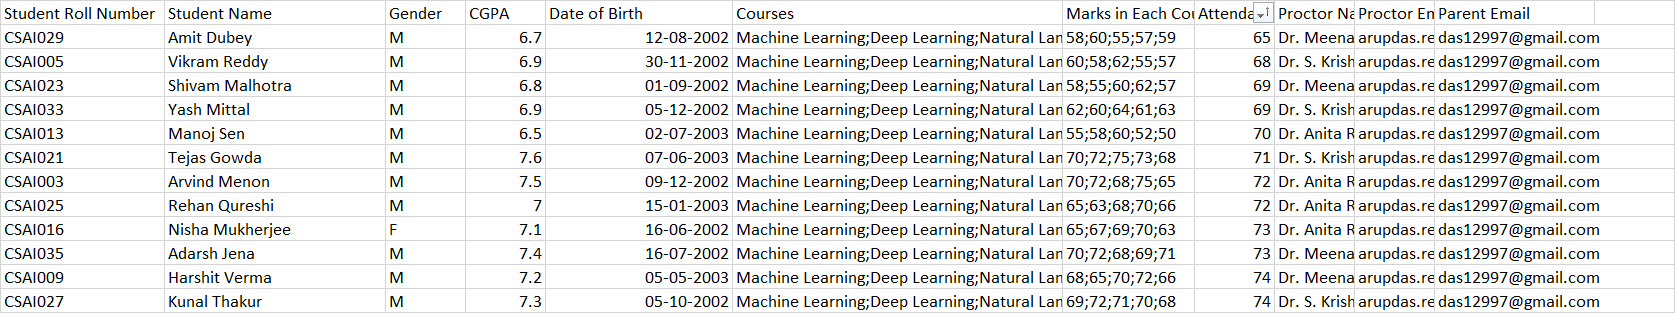

In [ ]:
import pandas as pd
from io import StringIO

df = pd.read_csv(StringIO(csv_content))
df.head()
low_attendance_df = df[df["Attendance Percentage"] < 75]
print(len(low_attendance_df))

12


In [ ]:
# This `user_prompt` variable is crucial because it's the specific instruction we give to our Generative AI model.
# It combines two main parts:
# 1.  The `csv_content`: This is the raw student data we defined earlier, which the AI needs to process.
# 2.  The Instruction: This tells the AI *what to do* with the data.
#
# In this case, the instruction is to:
#   -  Find all students whose 'Attendance Percentage' is below 75%.
#   -  Format the output as a JSON object, specifically with an `action` of "send_email",
#      an `attendance_threshold` of 75, an `email_body` (which the AI will generate based on the system prompt),
#      and a list of `students` who meet the criteria.
#
# This structured approach helps ensure the AI understands exactly what information to extract
# and how to present it, making it easier for our Python code to parse and use the AI's output.
user_prompt = f"""Below is student dataset in CSV format.

                  {csv_content}

                  Your task:
                  Extract all students with attendance < 75% and produce structured JSON:
                  {{
                      "action": "send_email",
                      "attendance_threshold": 75,
                      "email_body": "...",
                      "students": [ ... ]
                  }}
              """

In [ ]:
# This line sends the 'user_prompt' (which contains the CSV data and instructions) to the
# generative AI model (initialized as 'model'). The model processes this input and
# generates a response. The entire response object is stored in the 'response' variable.
response = model.generate_content(user_prompt)

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 2896.29ms


In [ ]:
print(response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "```json\n{\n  \"action\": \"send_email\",\n  \"attendance_threshold\": 75,\n  \"email_body\": \"Dear Parent/Guardian,\\n\\nThis email is to bring to your urgent attention a matter regarding your ward, {Student Name} ({Roll Number}), whose attendance percentage has fallen to {Attendance Percentage}%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\\n\\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that {Student Name}'s current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\\n\\nW

In [ ]:
# This line extracts the actual text content from the 'response' object generated by the model.
# The '.text' attribute accesses the string output, and '.strip()' removes any leading or
# trailing whitespace (like newlines or spaces) to get a clean string, which is then
# stored in the 'raw_text' variable.
raw_text = response.text.strip()

In [ ]:
print(raw_text)

```json
{
  "action": "send_email",
  "attendance_threshold": 75,
  "email_body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, {Student Name} ({Roll Number}), whose attendance percentage has fallen to {Attendance Percentage}%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that {Student Name}'s current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving {Student Name}'s attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a

In [ ]:
# This block of code is designed to clean the 'raw_text' received from the Generative AI model.
# The model sometimes wraps its JSON output in markdown code block syntax (e.g., ```json...```).
# These wrappers need to be removed before the text can be parsed as a valid JSON object.

# Checks if the 'raw_text' string starts with '```'. This indicates the presence of a markdown code block.
if raw_text.startswith("```"):
    # If it starts with '```', this line removes all leading and trailing backticks.
    raw_text = raw_text.strip("`")
    # This line specifically removes the 'json' keyword that often follows the opening backticks
    # (e.g., ```json). It only replaces the first occurrence to avoid removing 'json' from actual content.
    raw_text = raw_text.replace("json", "", 1).strip()

In [ ]:
print(raw_text)

{
  "action": "send_email",
  "attendance_threshold": 75,
  "email_body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, {Student Name} ({Roll Number}), whose attendance percentage has fallen to {Attendance Percentage}%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that {Student Name}'s current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving {Student Name}'s attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of

In [ ]:
try:
    parsed = json.loads(raw_text)
    print(parsed)
except Exception as e:
    print("[ERROR] Failed to parse JSON:", e)
    print("Raw LLM response:", raw_text)
    raise

{'action': 'send_email', 'attendance_threshold': 75, 'email_body': "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, {Student Name} ({Roll Number}), whose attendance percentage has fallen to {Attendance Percentage}%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that {Student Name}'s current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving {Student Name}'s attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this matter further and formulate a plan of action

In [ ]:
print("\n==== PARSED INSTRUCTION ====")
print(json.dumps(parsed, indent=4))


==== PARSED INSTRUCTION ====
{
    "action": "send_email",
    "attendance_threshold": 75,
    "email_body": "Dear Parent/Guardian,\n\nThis email is to bring to your urgent attention a matter regarding your ward, {Student Name} ({Roll Number}), whose attendance percentage has fallen to {Attendance Percentage}%. This is below the required 75% threshold for academic success and may significantly impact their performance and eligibility.\n\nRegular attendance is crucial for your child's continuous learning and engagement with the course material. We are concerned that {Student Name}'s current attendance record indicates they are falling behind, which could lead to difficulties in keeping up with their studies and potentially affect their overall academic progress.\n\nWe strongly emphasize the importance of improving {Student Name}'s attendance immediately. We kindly request your active support in ensuring that your child attends all classes regularly and punctually.\n\nTo discuss this ma